In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
train_file = '../data/train.csv'
test_file = '../data/test.csv'

In [3]:
pd.options.display.max_rows = 20

In [4]:
df = pd.read_csv(train_file)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
def preprocess(df):
    # Age, Sex, Name, Survived, Pclass, SibSp, Parch, Fare, Cabin, Embarked
    

In [5]:
cols_to_keep = [ 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
           'Parch', 'Fare', 'Cabin', 'Embarked']
df[cols_to_keep]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


Text(0.5, 1.0, 'Fraction survived by embarkation')

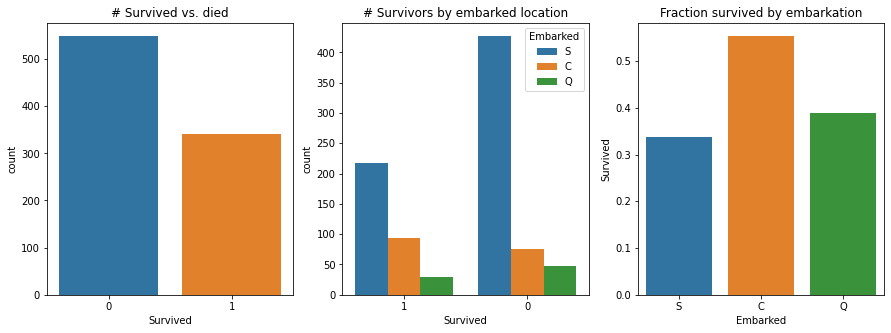

In [15]:
# Look at survival by sex,Embarked

fig, axes = plt.subplots(1,3,figsize=(15,5))

# Count plot of how many people embarked at each location
# countplot is for categorial data, barplot for quantitative data
sns.countplot(x="Survived", data=df, ax=axes[0])
axes[0].set_title("# Survived vs. died")

# Comparing survivors versus fatalities as a function of embarkation
sns.countplot(x="Survived", hue="Embarked", data=df, order=[1,0], ax=axes[1])
axes[1].set_title("# Survivors by embarked location")

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axes[2])
axes[2].set_title("Fraction survived by embarkation")

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Impute ages

In [17]:
# Create temp df of all good rows for age
fakedf = df.dropna(subset=['Age'],how='any',inplace=False)

In [18]:
# Make 10 quantiles for age
fakedf['AgeBand']=pd.qcut(fakedf['Age'],10,labels=range(10))

<ipython-input-18-00f7b6805444>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakedf['AgeBand']=pd.qcut(fakedf['Age'],10,labels=range(10))


In [21]:
fakedf[['Age','AgeBand']]

,Age,AgeBand
0,22.0,2
1,38.0,7
2,26.0,4
3,35.0,6
4,35.0,6
...,...,...
885,39.0,7
886,27.0,4
887,19.0,1
889,26.0,4


In [22]:
len(fakedf)

714

In [23]:
len(df)

891

In [24]:
# Make AgeBand col in orig df
df['AgeBand']=-99

In [25]:
# Fill in ageband in original df, using a randomly selected value if missing - safe to do since 10 quantiles are evenly matched in terms of counts in original data
for index,row in df.iterrows():
    if index in fakedf['AgeBand'].index:
        df.loc[index,'AgeBand'] = fakedf.loc[index,'AgeBand']
    else: 
        df.loc[index,'AgeBand'] = np.random.choice([0,1,2,3,4,5,6,7,8,9])

In [26]:
df[['Age','AgeBand']]

,Age,AgeBand
0,22.0,2
1,38.0,7
2,26.0,4
3,35.0,6
4,35.0,6
...,...,...
886,27.0,4
887,19.0,1
888,NaN,3
889,26.0,4


In [27]:
# Now get rid of original Age column since we don't need it anymore
df.drop(columns=['Age'],inplace=True)

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,7
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,6
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,6
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,4
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,4


## Cabin
The problem with this column is that MOST of the rows are missing this information

In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeBand          0
Deck             0
dtype: int64

In [29]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [30]:
def parse_cabin(s):
    if type(s) != str:
        return str(s)
    else:
        deck = s[0]
        return deck

In [31]:
df['Cabin'].apply(parse_cabin)

0      nan
1        C
2      nan
3        C
4      nan
      ... 
886    nan
887      B
888    nan
889      C
890    nan
Name: Cabin, Length: 891, dtype: object

In [32]:
def categorize_deck(deck):
    if deck == 'nan':
        return 0
    else:
        return ord(deck) - 64

In [33]:
df['Deck'] = df['Cabin'].apply(parse_cabin).apply(categorize_deck)

In [34]:
df['Deck'].value_counts()

0     687
3      59
2      47
4      33
5      32
1      15
6      13
7       4
20      1
Name: Deck, dtype: int64

In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,7,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,6,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,4,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,9,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,4,3


In [34]:
number_in_decks=[12,45,51,31,30,11,4,1]
fraction_in_decks = [x/sum(number_in_decks) for x in number_in_decks]
fraction_in_decks

[0.06486486486486487,
 0.24324324324324326,
 0.2756756756756757,
 0.16756756756756758,
 0.16216216216216217,
 0.05945945945945946,
 0.021621621621621623,
 0.005405405405405406]

In [35]:
df['Deck']

0      0
1      3
2      0
3      3
4      0
      ..
886    0
887    2
888    0
889    3
890    0
Name: Deck, Length: 891, dtype: int64

In [36]:
for index,row in df.iterrows():
    if df.loc[index,'Deck'] == 0:
        df.loc[index,'Deck'] = [np.random.choice([1,2,3,4,5,6,7,20], p=fraction_in_decks)]

In [37]:
df.Deck.value_counts()

3     250
2     210
5     149
4     144
1      63
6      50
7      18
20      7
Name: Deck, dtype: int64

In [38]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,7,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,6,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,4,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,9,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,4,3


## Embarked

In [39]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [40]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,Deck
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,7,2
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,9,2


In [41]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,7,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,6,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,4,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,9,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,4,3


In [42]:
df[df['PassengerId']==62]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,Deck
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,7,2


In [43]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,Deck
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,7,2
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,9,2


In [44]:
df.groupby('Embarked').mean('Survived')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeBand,Deck
Embarked,,,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144,4.517857,3.279762
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030,4.064935,3.519481
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812,4.349379,3.562112


In [45]:
df.loc[df.Embarked.isnull(), "Embarked"]="S"

In [46]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,Deck


In [47]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
AgeBand          0
Deck             0
dtype: int64

In [48]:
def parse_embarked(s):
    if s == 'S':
        return 0
    elif s == 'C':
        return 1
    else:
        return 2

In [49]:
df['Embarked'] = df['Embarked'].apply(parse_embarked)

In [50]:
df['Embarked']

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64

In [51]:
df['Deck'].value_counts()

3     250
2     210
5     149
4     144
1      63
6      50
7      18
20      7
Name: Deck, dtype: int64

In [52]:
df.groupby('Deck').mean().Survived

Deck
1     0.301587
2     0.409524
3     0.384000
4     0.368056
5     0.375839
6     0.460000
7     0.388889
20    0.285714
Name: Survived, dtype: float64

In [53]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [54]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x=='male' else 0)

In [55]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,2,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,7,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,4,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,6,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,0,4,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,0,9,4
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,1,4,3


In [56]:
df.drop(columns=['Cabin'],inplace=True)

In [57]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
AgeBand          0
Deck             0
dtype: int64

In [58]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
AgeBand          0
Deck             0
dtype: int64

In [59]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeBand,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,2,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,7,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,4,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,6,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0,4,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,0,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,0,9,4
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,1,4,3


In [61]:
df.drop(columns = ['Name','Ticket','PassengerId'], inplace=True)

In [64]:
df.drop(columns = ['Age'], inplace=True)

In [65]:
df #Final

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeBand,Deck
0,0,3,1,1,0,7.2500,0,2,4
1,1,1,0,1,0,71.2833,1,7,3
2,1,3,0,0,0,7.9250,0,4,2
3,1,1,0,1,0,53.1000,0,6,3
4,0,3,1,0,0,8.0500,0,6,4
...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,0,4,1
887,1,1,0,0,0,30.0000,0,1,2
888,0,3,0,1,2,23.4500,0,9,4
889,1,1,1,0,0,30.0000,1,4,3


In [66]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'AgeBand', 'Deck'],
      dtype='object')

In [67]:
features = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'AgeBand', 'Deck']]

In [68]:
labels = df[['Survived']]

In [69]:
features

,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeBand,Deck
0,3,1,1,0,7.2500,0,2,4
1,1,0,1,0,71.2833,1,7,3
2,3,0,0,0,7.9250,0,4,2
3,1,0,1,0,53.1000,0,6,3
4,3,1,0,0,8.0500,0,6,4
...,...,...,...,...,...,...,...,...
886,2,1,0,0,13.0000,0,4,1
887,1,0,0,0,30.0000,0,1,2
888,3,0,1,2,23.4500,0,9,4
889,1,1,0,0,30.0000,1,4,3


In [70]:
labels

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [71]:
labels = np.array(labels)
features = np.array(features)

In [86]:
# Split training into training + validation
train, val, train_labels, val_labels = train_test_split(features, labels, 
                                                          test_size = 0.3, 
                                                          random_state = RSEED)

In [87]:
len(train)

623

In [88]:
len(val)

268

In [73]:
RSEED=42

In [92]:
tree = DecisionTreeClassifier(random_state=RSEED)
# tree.fit(train,train_labels)/

In [93]:
tree

DecisionTreeClassifier(random_state=42)

In [94]:
tree.fit(train,train_labels)

DecisionTreeClassifier(random_state=42)

In [95]:
# Make probability predictions
train_probs = tree.predict_proba(train)[:, 1]
probs = tree.predict_proba(val)[:, 1]

train_predictions = tree.predict(train)
predictions = tree.predict(val)

In [100]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[127  30]
 [ 32  79]]


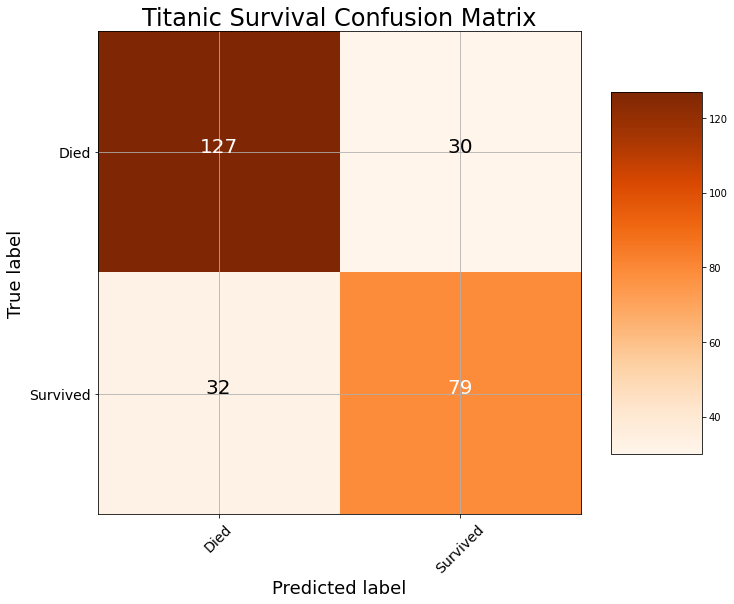

In [103]:
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(val_labels, predictions)
plot_confusion_matrix(cm, classes = ['Died', 'Survived'],
                      title = 'Titanic Survival Confusion Matrix')

## test set

In [84]:
df_test=pd.read_csv(test_file)

In [85]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
